# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017, completed by Junru Lu Nov. 2018**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
import os
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
try:
    import urllib2 as urllib
except ImportError:
    import urllib.request as urllib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# First check if PUIdata folder exists
if os.getenv("PUIDATA") is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
else:
    pass
print(os.getenv("PUIDATA"))

/nfshome/lj1230/PUIdata


In [3]:
response = urllib.urlretrieve('data:application/octet-stream;charset=utf-8,Country%2CGuns%20per%20100%20inhabitants%2CNumber%20of%20mass%20shootings%20(1983-2013)%0AAustralia%2C15%2C4%0AAustria%2C30.4%2C1%0ABelgium%2C17.2%2C2%0ACanada%2C30.8%2C4%0ADenmark%2C12%2C0%0AFinland%2C45.3%2C2%0AFrance%2C31.2%2C6%0AGermany%2C30.3%2C7%0AGreece%2C22.5%2C0%0AHolland%2C3.9%2C2%0AHungary%2C5.5%2C0%0AIceland%2C30.3%2C0%0AIreland%2C8.6%2C0%0AItaly%2C11.9%2C0%0AJapan%2C0.6%2C0%0ALuxembourg%2C15.3%2C0%0ANew%20Zealand%2C22.6%2C3%0ANorway%2C31.3%2C1%0APoland%2C1.3%2C0%0APortugal%2C8.5%2C1%0ASpain%2C10.4%2C1%0ASweden%2C31.6%2C2%0ASwitzerland%2C45.7%2C2%0AUnited%20Kingdom%2C6.2%2C3%0AUnited%20States%2C88.8%2C78', 
                              'MassShooting.csv')
response = urllib.urlretrieve('http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv', 
                              'WorldPopulation.zip')
response = urllib.urlretrieve('http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv', 
                              'GDP.zip')
!wget https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv -O Firearms.csv
!mv Firearms.csv MassShooting.csv $PUIDATA
!unzip WorldPopulation.zip -d $PUIDATA/WorldPopulation
!unzip GDP.zip -d $PUIDATA/GDP
!rm -f WorldPopulation.zip GDP.zip

--2018-11-11 12:07:43--  https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.200.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7852 (7.7K) [text/plain]
Saving to: ‘Firearms.csv’

Firearms.csv        100%[===================>]   7.67K  --.-KB/s    in 0s      

2018-11-11 12:07:43 (142 MB/s) - ‘Firearms.csv’ saved [7852/7852]

Archive:  WorldPopulation.zip
  inflating: /nfshome/lj1230/PUIdata/WorldPopulation/Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/lj1230/PUIdata/WorldPopulation/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
  inflating: /nfshome/lj1230/PUIdata/WorldPopulation/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv  
Archive:  GDP.zip
  inflating: /nfshom

In [4]:
massshooting = pd.read_csv(os.getenv("PUIDATA") + "/MassShooting.csv")
massshooting.dropna(inplace=True)
massshooting.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [5]:
worldpopulation = pd.read_csv(os.getenv("PUIDATA") + 
                              "/WorldPopulation/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv", skiprows=1, header=1)
worldpopulation = worldpopulation[['Country Name', '2012']].dropna()
worldpopulation.rename(columns={'2012': 'pop'}, inplace=True)
worldpopulation.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [6]:
gdp = pd.read_csv(os.getenv("PUIDATA") + 
                  "/GDP/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv", skiprows=1, header=1)
gdp = gdp[['Country Name', '2012']].dropna()
gdp.rename(columns={'2012': 'gdp'}, inplace=True)
gdp.head()

,Country Name,gdp
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09
5,Arab World,2.786139e+12


In [7]:
worldeconomics = worldpopulation.merge(gdp)
worldeconomics.head()

,Country Name,pop,gdp
0,Afghanistan,30696958.0,2.053654e+10
1,Angola,25096150.0,1.139232e+11
2,Albania,2900401.0,1.231978e+10
3,Andorra,82431.0,3.164615e+09
4,Arab World,373306993.0,2.786139e+12


In [8]:
firearms = pd.read_csv(os.getenv("PUIDATA") + "/Firearms.csv")
firearms = firearms[['Country/Territory', 'Average total all civilian firearms', 'Number of homicides by firearm']]
firearms.dropna(inplace=True)
firearms.rename(columns={"Country/Territory": "Country Name"}, inplace=True)
firearms.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm
0,Albania,270000.0,56.0
1,Algeria,1900000.0,20.0
4,Argentina,3950000.0,1198.0
5,Armenia,380000.0,9.0
6,Australia,3050000.0,30.0


In [9]:
df_ = firearms.merge(worldeconomics).merge(massshooting, right_on="Country", left_on="Country Name")
df_.rename(columns={"Number of mass shootings (1983-2013)": "Number of mass shootings"}, inplace=True)
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings
0,Australia,3050000.0,30.0,22742475.0,1.543411e+12,Australia,15.0,4
1,Austria,2500000.0,18.0,8429991.0,4.094252e+11,Austria,30.4,1
2,Belgium,1800000.0,70.0,11128246.0,4.978842e+11,Belgium,17.2,2
3,Canada,9950000.0,173.0,34750545.0,1.824289e+12,Canada,30.8,4
4,Denmark,650000.0,15.0,5591572.0,3.271489e+11,Denmark,12.0,0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


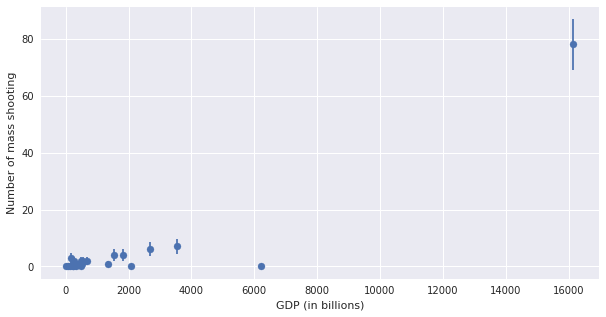

Number of mass shooting vs GDP, errors represent Poisson statistics.
The outlier to the top right of the plot is the USA, which has the highest GDP and the highest number of mass shootings. 


In [10]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The outlier to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of mass shootings. ")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


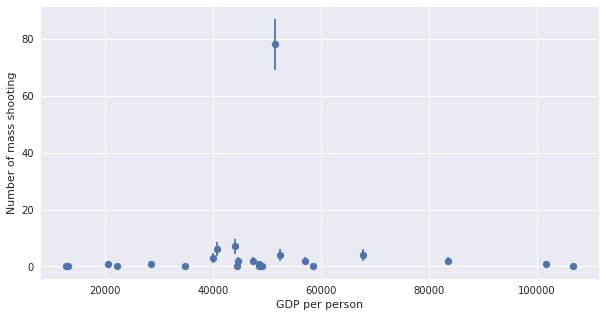

Number of mass shooting vs GDP per person, errors represent Poisson statistics.
The outlier to the top center of the plot is the USA, which has the highest number of mass shootings. 


In [11]:
df_['gdppp'] = df_["gdp"] / df_['pop']

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdppp, df_['Number of mass shootings'])
ax.errorbar(df_.gdppp, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per person")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP per person, " + 
       "errors represent Poisson statistics.\n" + 
       "The outlier to the top center of the plot is the USA, " + 
       "which has the highest number of mass shootings. ")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


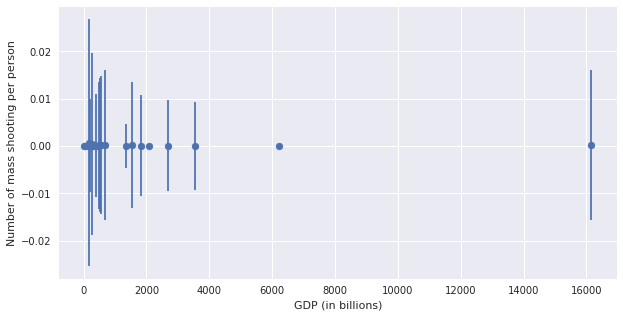

Number of mass shooting per person vs GDP, errors represent Poisson statistics.
The outlier to the right of the plot is the USA, which has the highest GDP. The outlier to the center of the plot is Japan, which has a relative high GDP. 


In [12]:
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['shootingspp'])
ax.errorbar(df_.gdp / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The outlier to the right of the plot is the USA, " + 
       "which has the highest GDP. " + 
       "The outlier to the center of the plot is Japan, " + 
       "which has a relative high GDP. ")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


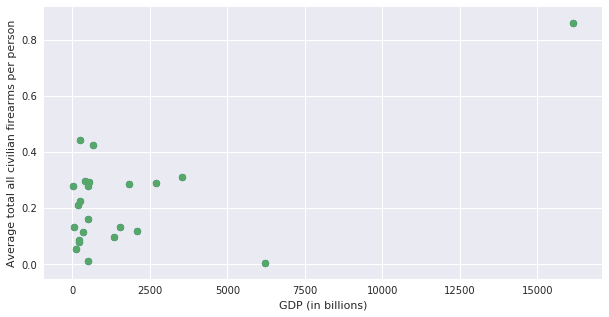

Average total all civilian firearms per person vs GDP.
The outlier to the top right of the plot is the USA, which has the highest GDP and the highest number of average total all civilian firearms per person. The outlier to the bottom center of the plot is Japan, which has a relative high GDP and the lowest number of average total all civilian firearms per person. 


In [13]:
df_['firearmspp'] = df_["Average total all civilian firearms"] / df_['pop']

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['firearmspp'])
ax.scatter(df_.gdp / 1e9, df_['firearmspp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average total all civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms per person vs GDP.\n" + 
       "The outlier to the top right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of average total all civilian firearms per person. " + 
       "The outlier to the bottom center of the plot is Japan, " + 
       "which has a relative high GDP and the lowest number of average total all civilian firearms per person. ")


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


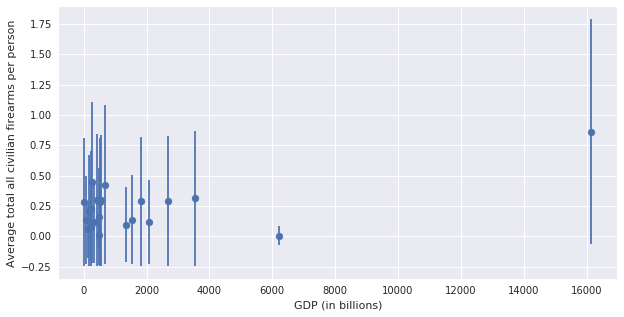

Average total all civilian firearms per person vs GDP, errors represent Poisson statistics.
The outlier to the right of the plot is the USA, which has the highest GDP and the highest number of average total all civilian firearms per person. The outlier to the bottom center of the plot is Japan, which has a relative high GDP and the lowest number of average total all civilian firearms per person. 


In [14]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['firearmspp'])
ax.errorbar(df_.gdp / 1e9, df_['firearmspp'], 
            yerr = np.sqrt(df_['firearmspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average total all civilian firearms per person")
ax.set_ylim()
pl.show()
print ("Average total all civilian firearms per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The outlier to the right of the plot is the USA, " + 
       "which has the highest GDP and the highest number of average total all civilian firearms per person. " + 
       "The outlier to the bottom center of the plot is Japan, " + 
       "which has a relative high GDP and the lowest number of average total all civilian firearms per person. ")


## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0.5,0,'homicides by firearm per 1000 people')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


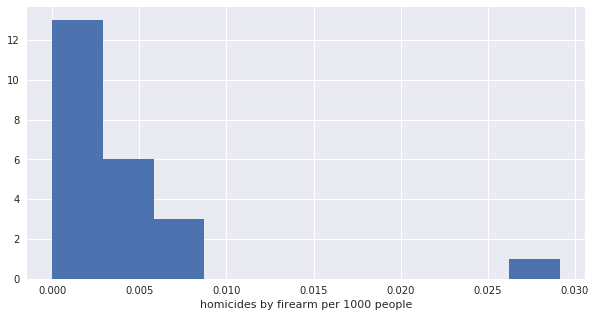

In [15]:
fig = plt.figure(figsize=(10, 5))
ax = fig.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


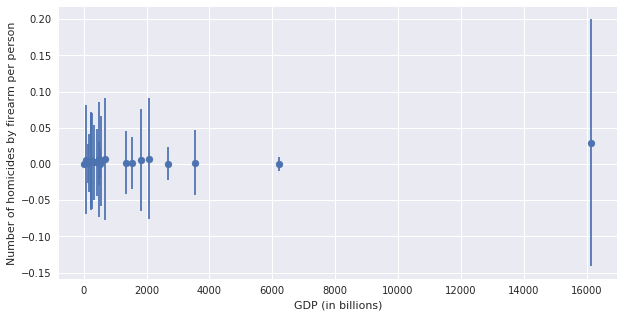

Number of homicides by firearm per person vs GDP, errors represent Poisson statistics.
The outlier to the right of the plot is the USA, which has the highest GDP. The outlier to the center of the plot is Japan, which has a relative high GDP. 


In [16]:
df_['homicidespp'] = df_['Number of homicides by firearm'] / df_['pop'] * 1000

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['homicidespp'])
ax.errorbar(df_.gdp / 1e9, df_['homicidespp'], 
            yerr = np.sqrt(df_['homicidespp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm per person")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The outlier to the right of the plot is the USA, " + 
       "which has the highest GDP. " + 
       "The outlier to the center of the plot is Japan, " + 
       "which has a relative high GDP. ")


## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


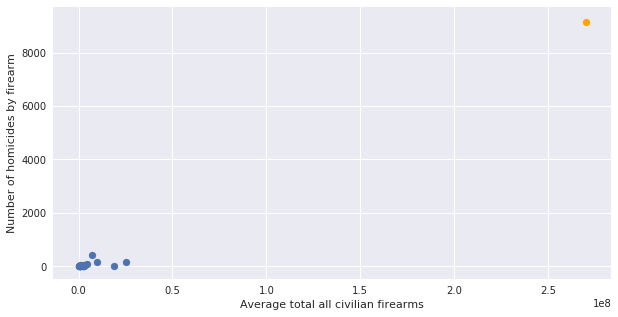

Number of homicides by firearm vs average total all civilian firearms, errors represent Poisson statistics, which is too small to show.
The outlier to the upper right of the plot is the USA, which has the highest average total all civilian firearms and highest number of homicides by firearm. 


In [17]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] != "United States"]['Number of homicides by firearm'])
ax.errorbar(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
            df_[df_['Country Name'] != "United States"]['Number of homicides by firearm'], 
            yerr = np.sqrt(df_[df_['Country Name'] != "United States"]['Number of homicides by firearm'] * 1.0), 
            fmt = '.')
ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'], c="orange")
ax.errorbar(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
            df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'], 
            yerr = np.sqrt(df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'] * 1.0), 
            fmt = '.', c="orange")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs average total all civilian firearms, " + 
       "errors represent Poisson statistics, which is too small to show.\n" + 
       "The outlier to the upper right of the plot is the USA, " + 
       "which has the highest average total all civilian firearms and highest number of homicides by firearm. ")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


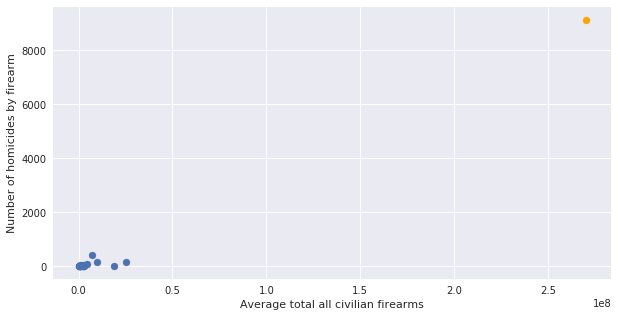

Number of homicides by firearm vs average total all civilian firearms.
The outlier to the upper right of the plot is the USA, which has the highest average total all civilian firearms and highest number of homicides by firearm. 


In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] != "United States"]['Number of homicides by firearm'])
ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of homicides by firearm'], c="orange")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
pl.show()
print ("Number of homicides by firearm vs average total all civilian firearms.\n" + 
       "The outlier to the upper right of the plot is the USA, " + 
       "which has the highest average total all civilian firearms and highest number of homicides by firearm. ")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


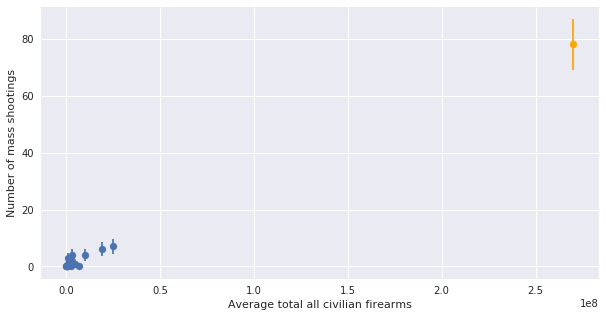

Number of mass shootings vs average total all civilian firearms, errors represent Poisson statistics.
The outlier to the upper right of the plot is the USA, which has the highest average total all civilian firearms and highest number of mass shootings. 


In [19]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] != "United States"]['Number of mass shootings'])
ax.errorbar(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
            df_[df_['Country Name'] != "United States"]['Number of mass shootings'], 
            yerr = np.sqrt(df_[df_['Country Name'] != "United States"]['Number of mass shootings'] * 1.0), 
            fmt = '.')
ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of mass shootings'], c="orange")
ax.errorbar(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
            df_[df_['Country Name'] == "United States"]['Number of mass shootings'], 
            yerr = np.sqrt(df_[df_['Country Name'] == "United States"]['Number of mass shootings'] * 1.0), 
            fmt = '.', c="orange")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs average total all civilian firearms, " + 
       "errors represent Poisson statistics.\n" + 
       "The outlier to the upper right of the plot is the USA, " + 
       "which has the highest average total all civilian firearms and highest number of mass shootings. ")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


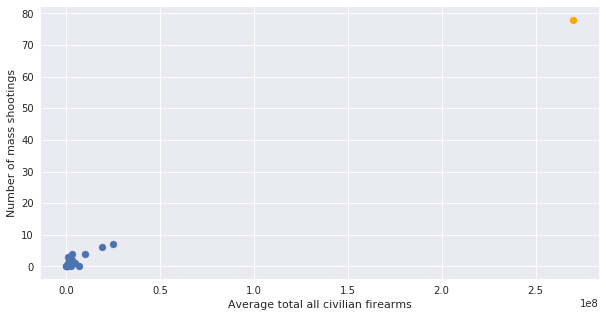

Number of mass shootings vs average total all civilian firearms.
The outlier to the upper right of the plot is the USA, which has the highest average total all civilian firearms and highest number of mass shootings. 


In [20]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_[df_['Country Name'] != "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] != "United States"]['Number of mass shootings'])
ax.scatter(df_[df_['Country Name'] == "United States"]["Average total all civilian firearms"], 
           df_[df_['Country Name'] == "United States"]['Number of mass shootings'], c="orange")
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shootings vs average total all civilian firearms.\n" + 
       "The outlier to the upper right of the plot is the USA, " + 
       "which has the highest average total all civilian firearms and highest number of mass shootings. ")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [21]:
# match unity
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e7
df_.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings,gdppp,shootingspp,firearmspp,homicidespp
0,Australia,3050000.0,30.0,22742475.0,1.543411e+12,Australia,15.0,4,67864.689862,1.758824,0.134110,0.001319
1,Austria,2500000.0,18.0,8429991.0,4.094252e+11,Austria,30.4,1,48567.695286,1.186241,0.296560,0.002135
2,Belgium,1800000.0,70.0,11128246.0,4.978842e+11,Belgium,17.2,2,44740.583248,1.797228,0.161751,0.006290
3,Canada,9950000.0,173.0,34750545.0,1.824289e+12,Canada,30.8,4,52496.694870,1.151061,0.286326,0.004978
4,Denmark,650000.0,15.0,5591572.0,3.271489e+11,Denmark,12.0,0,58507.500210,0.000000,0.116246,0.002683


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


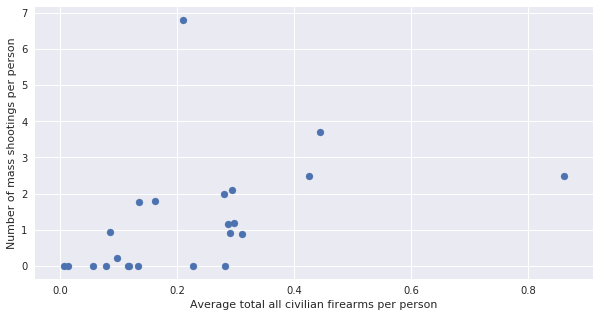

Number of mass shootings per person vs average total all civilian firearms per person.


In [22]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearmspp'], df_['shootingspp'])
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person.")

In [23]:
smols = sm.OLS(df_['shootingspp'], sm.add_constant(df_['firearmspp'])).fit()
smols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     4.981
Date:                Sun, 11 Nov 2018   Prob (F-statistic):             0.0367
Time:                        12:08:30   Log-Likelihood:                -40.676
No. Observations:                  23   AIC:                             85.35
Df Residuals:                      21   BIC:                             87.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.3684      0.497      0.742      0.467        -0.665     1.402
firearmspp     3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


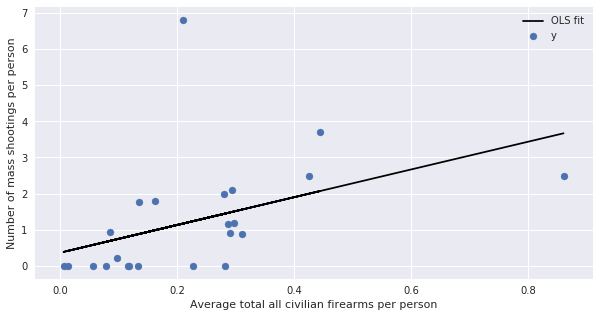

Number of mass shootings per person vs average total all civilian firearms per person, as well as the OLS fit line.


In [24]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearmspp'], df_['shootingspp'], label="y")
ax.plot(df_['firearmspp'], smols.predict(sm.add_constant(df_['firearmspp'])), label="OLS fit", color="black")
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, " + 
      "as well as the OLS fit line.")

In [25]:
# use a very small number to avoid 1/0
smwls = sm.WLS(df_['shootingspp'], sm.add_constant(df_['firearmspp']), 
               weights=[1/(sqrt(xx) + 1e-10) for xx in df_['firearmspp']]).fit()
smwls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.281
Model:                            WLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     8.220
Date:                Sun, 11 Nov 2018   Prob (F-statistic):            0.00923
Time:                        12:08:32   Log-Likelihood:                -38.631
No. Observations:                  23   AIC:                             81.26
Df Residuals:                      21   BIC:                             83.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0763      0.354      0.216      0.831        -0.659     0.812
firearmspp     4.9500      1.727      2.867      0.009         1.359     8.541
==============================================================================
Omnibus:                       35.826   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.403
Skew:                           2.738   Prob(JB):                     4.29e-22
Kurtosis:                      11.526   Cond. No.                         6.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


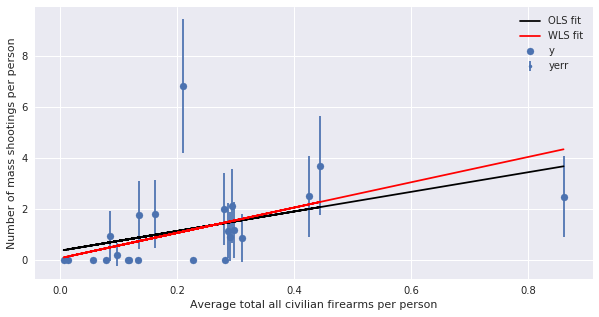

Number of mass shootings per person vs average total all civilian firearms per person, errors represent Poisson statistics.
Also the OLS and WLS fit line.


In [26]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearmspp'], df_['shootingspp'], label="y")
ax.plot(df_['firearmspp'], smols.predict(sm.add_constant(df_['firearmspp'])), label="OLS fit", color="black")
ax.plot(df_['firearmspp'], smwls.predict(sm.add_constant(df_['firearmspp'])), label="WLS fit", color="red")
ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.', label='yerr')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, " + 
      "errors represent Poisson statistics.\n" + 
      "Also the OLS and WLS fit line.")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


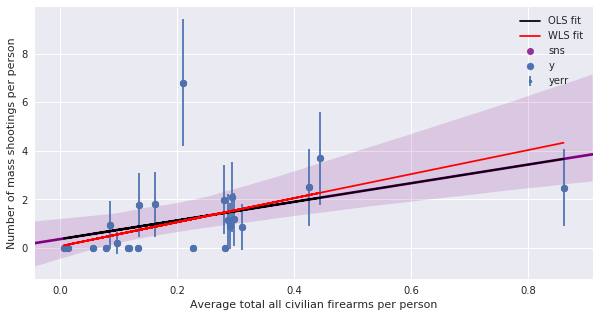

Number of mass shootings per person vs average total all civilian firearms per person, errors represent Poisson statistics.
Also the OLS, WLS and seaborn fit line.


In [27]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

sns.regplot(y='shootingspp', x='firearmspp', data=df_, ax=ax, color="purple", label="sns")
ax.scatter(df_['firearmspp'], df_['shootingspp'], label="y")
ax.plot(df_['firearmspp'], smols.predict(sm.add_constant(df_['firearmspp'])), label="OLS fit", color="black")
ax.plot(df_['firearmspp'], smwls.predict(sm.add_constant(df_['firearmspp'])), label="WLS fit", color="red")
ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.', label='yerr')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, " + 
      "errors represent Poisson statistics.\n" + 
      "Also the OLS, WLS and seaborn fit line.")

In [28]:
# I choose np.polyfit for linear regression
coeff, inter = np.polyfit(y=df_['shootingspp'], x=df_['firearmspp'], deg=1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


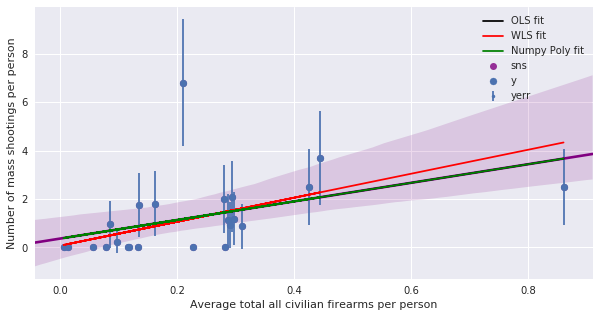

Number of mass shootings per person vs average total all civilian firearms per person, errors represent Poisson statistics.
Also the OLS, WLS, seaborn and Numpy Poly fit line.


In [29]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

sns.regplot(y='shootingspp', x='firearmspp', data=df_, ax=ax, color="purple", label="sns")
ax.scatter(df_['firearmspp'], df_['shootingspp'], label="y")
ax.plot(df_['firearmspp'], smols.predict(sm.add_constant(df_['firearmspp'])), label="OLS fit", color="black")
ax.plot(df_['firearmspp'], smwls.predict(sm.add_constant(df_['firearmspp'])), label="WLS fit", color="red")
ax.plot(df_['firearmspp'], coeff * df_['firearmspp'] + inter, label="Numpy Poly fit", color="Green")
ax.errorbar(df_['firearmspp'], df_['shootingspp'], yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.', label='yerr')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, " + 
      "errors represent Poisson statistics.\n" + 
      "Also the OLS, WLS, seaborn and Numpy Poly fit line.")

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

In [30]:
# remove the USA
df_new = df_[~df_['Country Name'].isin(["United States", "New Zealand"])]
df_new.head()

,Country Name,Average total all civilian firearms,Number of homicides by firearm,pop,gdp,Country,Guns per 100 inhabitants,Number of mass shootings,gdppp,shootingspp,firearmspp,homicidespp
0,Australia,3050000.0,30.0,22742475.0,1.543411e+12,Australia,15.0,4,67864.689862,1.758824,0.134110,0.001319
1,Austria,2500000.0,18.0,8429991.0,4.094252e+11,Austria,30.4,1,48567.695286,1.186241,0.296560,0.002135
2,Belgium,1800000.0,70.0,11128246.0,4.978842e+11,Belgium,17.2,2,44740.583248,1.797228,0.161751,0.006290
3,Canada,9950000.0,173.0,34750545.0,1.824289e+12,Canada,30.8,4,52496.694870,1.151061,0.286326,0.004978
4,Denmark,650000.0,15.0,5591572.0,3.271489e+11,Denmark,12.0,0,58507.500210,0.000000,0.116246,0.002683


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


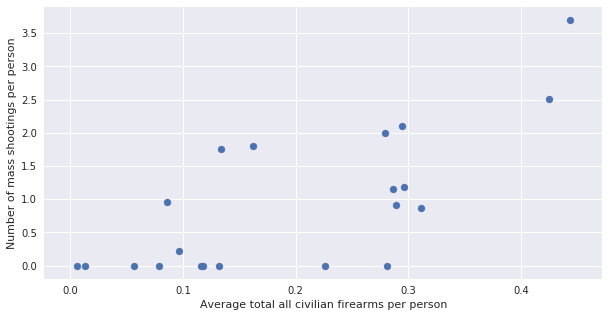

Number of mass shootings per person vs average total all civilian firearms per person, remove outliers.


In [31]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_new['firearmspp'], df_new['shootingspp'])
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person, remove outliers.")

In [32]:
smols = sm.OLS(df_new['shootingspp'], sm.add_constant(df_new['firearmspp'])).fit()
smols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     21.02
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           0.000202
Time:                        12:08:45   Log-Likelihood:                -22.679
No. Observations:                  21   AIC:                             49.36
Df Residuals:                      19   BIC:                             51.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2731      0.306     -0.894      0.383        -0.913     0.367
firearmspp     6.0230      1.314      4.585      0.000         3.274     8.772
==============================================================================
Omnibus:                        0.185   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.379
Skew:                           0.141   Prob(JB):                        0.828
Kurtosis:                       2.405   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# use a very small number to avoid 1/0
smwls = sm.WLS(df_new['shootingspp'], sm.add_constant(df_new['firearmspp']), 
               weights=[1/(sqrt(xx) + 1e-10) for xx in df_new['firearmspp']]).fit()
smwls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:            shootingspp   R-squared:                       0.556
Model:                            WLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     23.76
Date:                Sun, 11 Nov 2018   Prob (F-statistic):           0.000105
Time:                        12:08:45   Log-Likelihood:                -20.486
No. Observations:                  21   AIC:                             44.97
Df Residuals:                      19   BIC:                             47.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1307      0.194     -0.674      0.509        -0.537     0.275
firearmspp     5.3794      1.104      4.874      0.000         3.070     7.689
==============================================================================
Omnibus:                        0.986   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.611   Jarque-Bera (JB):                0.901
Skew:                           0.308   Prob(JB):                        0.637
Kurtosis:                       2.195   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
coeff, inter = np.polyfit(y=df_new['shootingspp'], x=df_new['firearmspp'], deg=1)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


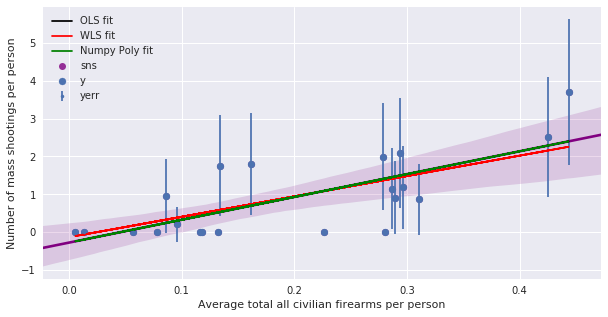

Number of mass shootings per person vs average total all civilian firearms per person (outliers removed), errors represent Poisson statistics.
Also the OLS, WLS, seaborn and Numpy Poly fit line.


In [35]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

sns.regplot(y='shootingspp', x='firearmspp', data=df_new, ax=ax, color="purple", label="sns")
ax.scatter(df_new['firearmspp'], df_new['shootingspp'], label="y")
ax.plot(df_new['firearmspp'], smols.predict(sm.add_constant(df_new['firearmspp'])), label="OLS fit", color="black")
ax.plot(df_new['firearmspp'], smwls.predict(sm.add_constant(df_new['firearmspp'])), label="WLS fit", color="red")
ax.plot(df_new['firearmspp'], coeff * df_new['firearmspp'] + inter, label="Numpy Poly fit", color="Green")
ax.errorbar(df_new['firearmspp'], df_new['shootingspp'], yerr = np.sqrt(df_new['shootingspp'] * 1.0), 
            fmt = '.', label='yerr')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person (outliers removed), " + 
      "errors represent Poisson statistics.\n" + 
      "Also the OLS, WLS, seaborn and Numpy Poly fit line.")

# When outliers removed, the fitting results are obviously improved

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


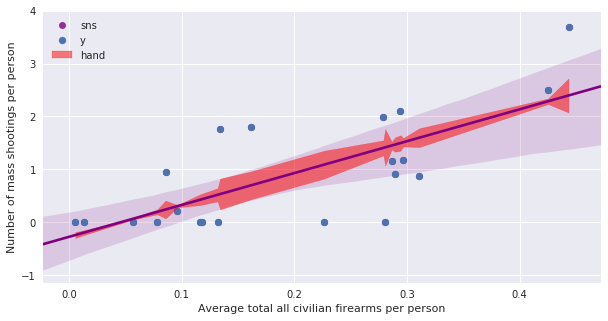

Number of mass shootings per person vs average total all civilian firearms per person (outliers removed), errors represent Poisson statistics.
Also the confidence intervals of y_hat by seaborn and hand.


In [36]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

df_new.sort_values("firearmspp", inplace=True)
sns.regplot(y='shootingspp', x='firearmspp', data=df_new, ax=ax, color="purple", label="sns")
ax.scatter(df_new['firearmspp'], df_new['shootingspp'], label="y")
y_hat = coeff * df_new['firearmspp'] + inter
sy = sqrt((df_new['shootingspp'] - y_hat) ** 2 / (len(df_new['firearmspp']) - 2))
ci = sqrt(1 + 1/len(df_new['firearmspp']) + (df_new['firearmspp'] - df_new['firearmspp'].mean() ** 2) / 
          (df_new['firearmspp'] - df_new['firearmspp'].mean() ** 2).sum())
ax.fill_between(df_new['firearmspp'], y_hat - sy * ci, y_hat + sy * ci, alpha=0.5, label="hand", color="Red")
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.legend()
ax.set_ylim()
pl.show()
print("Number of mass shootings per person vs average total all civilian firearms per person (outliers removed), " + 
      "errors represent Poisson statistics.\n" + 
      "Also the confidence intervals of y_hat by seaborn and hand.")

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


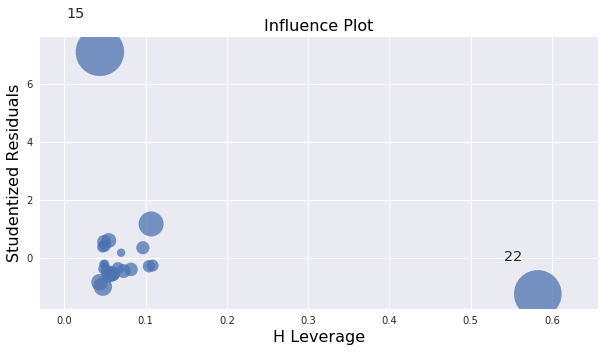

In [37]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

smols = sm.OLS(df_['shootingspp'], sm.add_constant(df_['firearmspp'])).fit()
sm.graphics.influence_plot(smols, alpha=0.05, criterion="cooks", ax=ax)
pl.show()

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


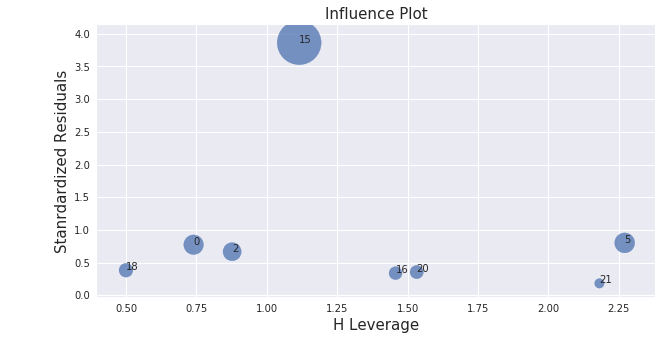

In [38]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

smwls = sm.WLS(df_['shootingspp'], sm.add_constant(df_['firearmspp']), 
               weights=[1/(sqrt(xx) + 1e-10) for xx in df_['firearmspp']]).fit()
ax.scatter(x=smwls.fittedvalues, y=smwls.resid_pearson, s=smwls.resid_pearson * 500, alpha=0.75)
for i, txt in enumerate(df_.index):
    ax.annotate(txt, (smwls.fittedvalues[i], smwls.resid_pearson[i]))
ax.set_title("Influence Plot", fontsize=15)
ax.set_xlabel("H Leverage", fontsize=15)
ax.set_ylabel("Stanrdardized Residuals", fontsize=15)
ax.set_ylim()
pl.show()

## Discuss your findings

## The USA is no longer a high leverage point in WLS, which means its influence on the fitting of overall data is lower. However, New Zealand is still an outlier.